In [1]:
%matplotlib inline
# %matplotlib is a magic function in IPython. I'll quote the relevant documentation here for you to read for convenience:
# IPython has a set of predefined ‘magic functions’ that you can call with a command line style syntax. There are two kinds of magics, line-oriented and cell-oriented. Line magics are prefixed with the % character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. Lines magics can return results and can be used in the right hand side of an assignment. Cell magics are prefixed with a double %%, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument.
# %matplotlib inline sets the backend of matplotlib to the 'inline' backend:
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
# When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code. It may be worth also reading How to make IPython notebook matplotlib plot inline for reference on how to use it in your code.
# If you want interactivity as well, you can use the nbagg backend with %matplotlib notebook (in IPython 3.x), as described here.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pygmid import Lookup as lut
import os

from IPython.core.display import Image
# filepath_Book_65nm_figs = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_65nm\\plots_LUTs_python\\Book_Chap1\\'
# fig_1_1_65nm = filepath_Book_65nm_figs + 'Book_Fig_1_1.png'
# Image(fig_1_1_65nm, width=800, height=800)

`Chap. 2 Introduction / Basic Transistor Modeling`
============================================
The purpose of this chapter is to `review physical aspects of MOS transistors` and to consider a few models that describe their behavior.  
  
**We begin with a physical model**: the charge sheet model (CSM), which lays the foundation for understanding the concept of inversion level, as promoted in this book.  
Since the **CSM is too complex for circuit design**, we look for simplifications and therefore introduce the *`“basic” EKV model`*.  
  
We make use of the latter to construct characteristics that are compared with those of real transistors. Because the basic EKV model is a long-channel model (like the CSM), it does not fit the characteristics of modern transistors (short-channel devices) with high accuracy.  
  
**`However, the intuition that the model provides sets the stage for the gm/ID-based sizing methodology studied in this book.`**

**`Before proceeding any further let's define the technology used below`**  
*By Default the Book 65nm models are used as to compare with the plots shown in the Book.*


In [3]:
filepath_dir = os.getcwd()
print(f"filepath_dir = {filepath_dir}")
str_technology = input("Please choose desired technology in nm: 65 (def), 180, 40, 28, 22) ")
str_vt = input('Please insert Vth flavor (svt, lvt, hvt): ')
str_mos_lib = input('Please insert MOS process (tt, ss or ff): ')
    
if str_technology == '180':
    filepath_dir = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_180nm\\'
    device1 = f'180nch_{str_vt}_mac_{str_mos_lib}_lib.mat'
    device2 = f'180pch_{str_vt}_mac_{str_mos_lib}_lib.mat'
elif str_technology == '40':
    filepath_dir = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_40nm\\'
    device1 = f'40nch_{str_vt}_mac_{str_mos_lib}_lib.mat'
    device2 = f'40pch_{str_vt}_mac_{str_mos_lib}_lib.mat'
elif str_technology == '28':
    filepath_dir = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_28nm\\'
    device1 = f'28nch_{str_vt}_mac_{str_mos_lib}_lib.mat'
    device2 = f'28pch_{str_vt}_mac_{str_mos_lib}_lib.mat'
elif str_technology == '22':
    filepath_dir = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_22nm\\'
    device1 = f'22nch_{str_vt}_mac_{str_mos_lib}_lib.mat'
    device2 = f'22pch_{str_vt}_mac_{str_mos_lib}_lib.mat'
else:
    filepath_dir = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_65nm\\'
    device1 = f'65nch_{str_vt}_mac_{str_mos_lib}_lib.mat'
    device2 = f'65pch_{str_vt}_mac_{str_mos_lib}_lib.mat'

filepath_dir_fig = filepath_dir + 'plots_LUTs_python\\Book_Chap2'
if not os.path.exists(filepath_dir_fig):
    # if the folder directory is not present then create it.
    print("Creating figures/plots directory.")
    os.makedirs(filepath_dir_fig)

filepath_dir = c:\Users\jruib\OneDrive\Documents\GitHub\pygmid\Systematic_Analog_Design_LUTs\Chapter_2


### **`Chosen devices`**  

In [4]:
print(f"device1 = {device1}")
device1_LUT = filepath_dir+device1
print(f"device1_LUT = {device1_LUT}")

print(f"device2 = {device2}")
device2_LUT = filepath_dir+device2
print(f"device2_LUT = {device2_LUT}")
        
NCH = lut(device1_LUT)  # load MATLAB data into pygmid lookup object
PCH = lut(device2_LUT)  # load MATLAB data into pygmid lookup object       

device1 = 65nch_svt_mac_tt_lib.mat
device1_LUT = C:\Users\jruib\OneDrive\Documents\Systematic_Analog_Design\LUTs_65nm\65nch_svt_mac_tt_lib.mat
device2 = 65pch_svt_mac_tt_lib.mat
device2_LUT = C:\Users\jruib\OneDrive\Documents\Systematic_Analog_Design\LUTs_65nm\65pch_svt_mac_tt_lib.mat


In [5]:
str_save_Figs = input('Would you like to save the following Figures: (yes/no)')
if str_save_Figs == 'yes':
    save_Figs = True
    dpi = 600
else:
    save_Figs = False


In [6]:
VDSs = NCH['VDS']       # lookup object has pseudo-array access to data
W_lut = NCH['W']
L_lut = NCH['L']
L_Min = min(L_lut)
dev_Temp = NCH['TEMP']
VGSs = np.arange(0.4, 0.6, 0.05)
VGS_lut = NCH['VGS']
VBS_lut = NCH['VSB']

print(f"***********************************************")
print(f"VDSs = {VDSs}")
print(f"***********************************************")
print(f"W_LUT = {W_lut}")
print(f"***********************************************")
print(f"L_LUT = {L_lut}")
print(f"***********************************************")
print(f"VGS_LUT = {VGS_lut}")
print(f"***********************************************")
print(f"VBS_LUT = {VBS_lut}")
print(f"***********************************************")
print(f"dev_Temp = {dev_Temp}")
print(f"***********************************************")

***********************************************
VDSs = [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175
 1.2  ]
***********************************************
W_LUT = 10.0
***********************************************
L_LUT = [0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19
 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95 1.  ]
***********************************************
VGS_LUT = [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175
 1.2  ]
***********

In [16]:
from pygmid import EKV_param_extraction, XTRACT

In [22]:
def invq(Z_invq):
    # % FUNCTION evaluates y so that Z_invq = 2*(y - 1) + log(y),
    # % Z may be a scalar, a vector or a matrix.
    dimension_Z_invq = np.ndim(Z_invq)
    if dimension_Z_invq == 1:
        Z_invq = Z_invq.reshape(Z_invq.shape[0],1)
    m = np.shape(Z_invq)
    m1 = m[0]
    m2 = m[1]
    # print(m1)
    # print(m2)

    if m1 == 1:
        if m2 > 1:
            # Z_invq = Z_invq.T
            Z_invq = np.transpose(Z_invq)
            m3 = 1
        else:
            Z_invq = Z_invq
            m3 = m2
    else:
        Z_invq = Z_invq
        m3 = m2

    # Example 2.16 Z = VP/UT 90nm
    # Z_invq[0,0] = -5.4324
    # Z_invq[1,0] = -2.7285
    # Z_invq[2,0] = 0.0399
    # Z_invq[3,0] = 2.8718
    # Z_invq[4,0] = 5.7588
    # Z_invq[5,0] = 8.6920
    # Z_invq[6,0] = 11.6461
    # Z_invq[7,0] = 14.6049
    k = 1
    xx = np.zeros((len(Z_invq), m3))
    while k <= m3:
        y = Z_invq[:,(k-1)] # puts each column at a time in
        # [a1 b1] = find(y<=.1)  # returns [row col], so a1 is a list of rows and b1 list of colums, with
        # a1[0] and b1[0] being the coordinates of the 1st value <=0.1
        a1 = (y <= 0.1)
        # a1 = np.where(y <= 0.1)
        # Y = y[a1]
        x = np.ones((len(y), 1))
        if a1.any():
            Y = y[a1].reshape(y[a1].shape[0],1)
            e = 1
            u = Y + 2
            while np.max(abs(e)) >= 1e-8:
                d = Y - 2*(np.exp(u)-1) - u
                e = d/(2*np.exp(u) + 1)
                u = u + e

            # TODO : FROM HERE DOWN!!!!!!!!!
            # Id = np.empty((len(VGS_lut), len(VDS), len(L)))
            # print(f"Creating empty Id matrix with shape --> {Id.shape} (Vgs's, Vds's, L's)")
            # for k in range(0,len(L)):
            #     print(f"k={k}")
            #     print(f"L[k]={L[k]}")
            #     Id[:,:,k] = NCH.look_up('ID', VDS= VDS, L=L[k]) # % Id(Vgs,Vds,L)

            # x[a1,:] = np.exp(u)
            x[a1,:] = np.exp(u)

        # [a2 b2] = find(y>.1); Y = y(a2);
        a2 = (y > 0.1)
        if a2.any():
            Y = y[a2].reshape(y[a2].shape[0],1)
            e = 1
            # X = 1e-4*b2
            X = np.ones((len(Y), 1))
            X = X*1e-4
            # print(X)
            while e >= 1e-4:
                z = 2*(X-1) + np.log(X)
                u = X*(1 + (Y-z)/(2*X+1))
                e = np.max(abs((u - X)/X))
                X = u
        # if size(a2) == 0:
        if not a2.any(): # check if there is any element equal to True in a2.
            # x = x # Makes x to be just the values which were below or equal to 0.1
            x = x[a1,:] # Drop all x elements where a2 = False, which are none!
        else:
            x[a2,:] = X

        # xx[:,(k-1)] = x # apparently xx[:,k] becomes momentarily a (r,), as it sees it as a 1D slice, so can't broadcast a (r,1) or 2D into it!!!
        # Options: force slice to be 2D or change x from 2D to 1D
        # xx[:,(k-1):k].shape --> (8,1)
        # xx[:,(k-1)].shape --> (8,)
        # x.shape --> (8, 1)
        # np.reshape(x, -1).shape --> (8,)
        xx[:,(k-1)] = np.reshape(x, -1)
        k = k + 1

    if m1 == 1:
        if m2 > 1:
            y = np.transpose(xx)
        else:
            y = xx
    else:
        y = xx

    # >>> a = np.array([[1,2,3],[2,3,4]])
    # >>> a
    # array([[1, 2, 3],
    #        [2, 3, 4]])

    # >>> z = np.zeros((2,1), dtype=int64)
    # >>> z
    # array([[0],
    #        [0]])

    # >>> np.append(a, z, axis=1)
    # array([[1, 2, 3, 0],
    #        [2, 3, 4, 0]])
    return y

# **************************************************************

In [18]:
def to1D(x):
    y = np.reshape(x,-1)
    return y

In [23]:
def interpolated_intercepts(x, y1, y2):
    """Find the intercepts of two curves, given by the same x data"""

    def intercept(point1, point2, point3, point4):
        """find the intersection between two lines
        the first line is defined by the line between point1 and point2
        the first line is defined by the line between point3 and point4
        each point is an (x,y) tuple.

        So, for example, you can find the intersection between
        intercept((0,0), (1,1), (0,1), (1,0)) = (0.5, 0.5)

        Returns: the intercept, in (x,y) format
        """    

        def line(p1, p2):
            A = (p1[1] - p2[1])
            B = (p2[0] - p1[0])
            C = (p1[0]*p2[1] - p2[0]*p1[1])
            return A, B, -C

        def intersection(L1, L2):
            D  = L1[0] * L2[1] - L1[1] * L2[0]
            Dx = L1[2] * L2[1] - L1[1] * L2[2]
            Dy = L1[0] * L2[2] - L1[2] * L2[0]

            x = Dx / D
            y = Dy / D
            return x,y

        L1 = line([point1[0],point1[1]], [point2[0],point2[1]])
        L2 = line([point3[0],point3[1]], [point4[0],point4[1]])

        R = intersection(L1, L2)

        return R

    y_signs = np.sign(y1 - y2)
    # print(f"y_signs = {y_signs} \n ")
    y_signs_diffs = np.diff(y_signs)
    # print(f"y_signs_diffs = {y_signs_diffs} \n ")
    idxs_0 = np.argwhere(y_signs == 0.0)
    idxs = np.argwhere(y_signs_diffs != 0)

    xcs = []
    ycs = []
    
    # if np.size(idxs_0):
    #     print("No need for Interpolation! y1 = y2 exists.")
    #     # print(f"idxs = {idxs} \n ")
    #     print(f"idxs (=0) = {idxs_0} \n ")
        
    #     for idx0 in idxs_0:
    #         xc = x[idx0]
    #         yc = y1[idx0]
    #         xcs.append(xc)
    #         ycs.append(yc)    
    # else:
    #     print("Using interpolation! y1 = y2 does not exist.")
    #     print(f"idxs = {idxs} \n ")        
    for idx in idxs:
        xc, yc = intercept((x[idx], y1[idx]),((x[idx+1], y1[idx+1])), ((x[idx], y2[idx])), ((x[idx+1], y2[idx+1])))
        if xc in xcs:
            print(f"X-value already exists!")
        else:
            xcs.append(xc)
            ycs.append(yc)

    return np.array(xcs), np.array(ycs)

In [25]:
# Use pygmid XTRACT function
VDSs_i = 0.6
rho = 0.6

(VDS_EKV, n_EKV, VT_EKV, JS_EKV, d1n_EKV, d1VT_EKV, d1logJS_EKV, d2n_EKV, \
 d2VT_EKV, d2logJS_EKV) = EKV_param_extraction(NCH, mode = 1, L = L_Min, VDS = VDSs_i, VSB = 0.0, rho=rho)

# % XTRACT OUTPUTS =====================================
# % y = [VDS n VT JS d1n d1VT d1logJS d2n d2VT d2logJS];
print("\t\t\tEKV XTRACT Function\n\n")
print("y = [VDS n VT JS d1n d1VT d1logJS d2n d2VT d2logJS]\n")
print("n --> subthreshold slope factor, VT --> threshold voltage,\n")
print("JS --> Specific current density ( Is when W = 1um)\n")
print("remaining parameters are the sensitivities of each parameter to Vds, 1st and 2nd derivatives.\n")

print(f"EKV_param_extraction: VDS = {VDS_EKV*1e3:.1f} mV")
print(f"EKV_param_extraction: n = {n_EKV:.2f} ")
print(f"EKV_param_extraction: VT = {VT_EKV*1e3:.1f} mV")
print(f"EKV_param_extraction: JS = {JS_EKV*1e6:.1f} uA/um")
print(f"EKV_param_extraction: d1n = {d1n_EKV*1e3:.3f}*1e-3")
print(f"EKV_param_extraction: SVT d1VT = {d1VT_EKV*1e3:.3f}*1e-3")
print(f"EKV_param_extraction: SIS d1logJS = {d1logJS_EKV*1e3:.3f}*1e-3")
print(f"EKV_param_extraction: d2n = {d2n_EKV*1e3:.3f}*1e-3")
print(f"EKV_param_extraction: SVT2 d2VT = {d2VT_EKV*1e3:.3f}*1e-3")
print(f"EKV_param_extraction: SIS2/d2logJS = {d2logJS_EKV*1e3:.3f}*1e-3")

			EKV XTRACT Function


y = [VDS n VT JS d1n d1VT d1logJS d2n d2VT d2logJS]

n --> subthreshold slope factor, VT --> threshold voltage,

JS --> Specific current density ( Is when W = 1um)

remaining parameters are the sensitivities of each parameter to Vds, 1st and 2nd derivatives.

EKV_param_extraction: VDS = 600.0 mV
EKV_param_extraction: n = 1.47 
EKV_param_extraction: VT = 497.3 mV
EKV_param_extraction: JS = 7.5 uA/um
EKV_param_extraction: d1n = -8.811*1e-3
EKV_param_extraction: SVT d1VT = -82.902*1e-3
EKV_param_extraction: SIS d1logJS = 217.491*1e-3
EKV_param_extraction: d2n = 26.531*1e-3
EKV_param_extraction: SVT2 d2VT = 21.357*1e-3
EKV_param_extraction: SIS2/d2logJS = -84.189*1e-3


**`Greek Symbols`**  
$\alpha$, $\beta$, $\gamma$, $\delta$, $\epsilon$, $\zeta$, $\eta$, $\theta$, $\iota$
$\kappa$, $\lambda$, $\mu$, $\nu$, $\xi$, $\omicron$, $\pi$, $\rho$, $\sigma$, $\tau$  
$\upsilon$, $\phi$, $\chi$, $\psi$, $\omega$,  $\Omega$, $\Delta$, $\Sigma$

In [21]:
# skip this, this is just to display nice tables.
from itertools import zip_longest
class Table(list):
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            for col in row:
                try:
                    float(col)
                    html.append("<td>%.3f</td>" % col)
                except(ValueError):
                    html.append("<td><b>%s</b></td>" % col)
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## **`Fig 2.1 - Contribution of Drift & Diffusion Currents to total Current`**  
**Consider the common-source, saturated MOS transistor as an example.**  

*Assume that the doping concentration N of the substrate is equal to 10^17 atoms/cm^3, the gate oxide thickness is tox = 5 nm and µ*Cox = 345 uA/V^2.  
Because the source is grounded, VS is zero. We assume that the mobile charge density at the drain is also equal to zero since the transistor is saturated. Extracting ψSS and ψSD from (2.7), we find the drain current using (2.4) and (2.5).  
`Unfortunately, (2.7) can only be solved numerically. To overcome this problem, we make use of the surfpot(p, V, VG) function, which can be found in the Matlab toolbox accompanying this book.`*  

The obtained result is shown in Figure 2.1.  
  
The figure displays not only the current but also the contributions due to drift and diffusion. We see that in the right part of Figure 2.1, the drift current is larger than the diffusion current, meaning that strong inversion conditions prevail. Left, the diffusion current takes over, which corresponds to weak inversion.  
**Of particular interest is the point where drift and diffusion currents are equal. We will show further that the gate voltage at the intersection can be viewed as the threshold voltage, though the CSM truly ignores the concept of a threshold for the simple reason that it is essentially not a meaningful physical parameter.**

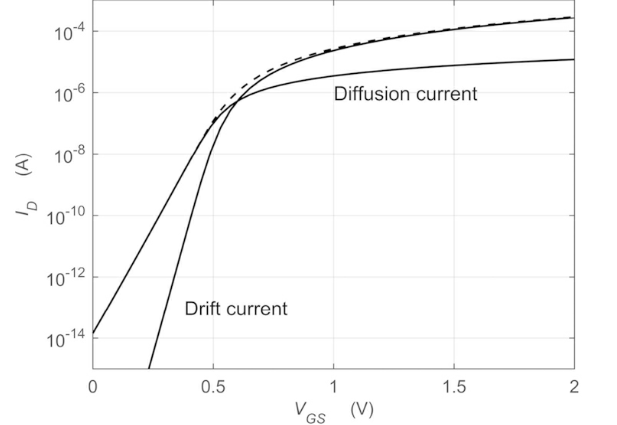

In [26]:
filepath_Book_65nm_figs = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_65nm\\plots_LUTs_python\\Book_Chap2\\'
fig_2_1_65nm = filepath_Book_65nm_figs + 'Book_Fig_2_1.png'
Image(fig_2_1_65nm, width=800, height=800)

The changing nature of the drain current when the gate voltage is swept from small to large values brings important consequences.  
  
`In weak inversion, the current varies exponentially with the gate voltage. In strong inversion, the drain current follows a quadratic law. The well-known quadratic and exponential drain current equations currently used by circuit designers represent acceptable approximations of these regions. It is important to be aware, however, that an increasing number of CMOS circuits do not operate in strong or weak inversion but in the so-called moderate inversion region, which lies in between. The trouble is that there aren’t any simple models for this region.`  
  
The CSM coalesces weak and strong inversion and describes the passage from one mode to another in a continuous manner. `Unfortunately, because an analytical expression of the surface potential is lacking, the model is impractical for circuit design. A rigorous and simple continuous physical model that lends itself to hand-sizing of CMOS circuits throughout all possible modes of operation does not exist.` 
  
**We will show below that the so-called EKV model is a valuable alternative.**

In [ ]:
def pMat(T, N, tox):
    # Computes the technology vector
    
    # T, N, and tox may be scalars or equal-length row vectors
    
    # Physical constants
    T0 = 300.0          # Reference temperature (K)
    UG = 1.205          # Band gap voltage (V)
    q = 1.602e-19       # Electron charge (C)
    UT0 = 0.0259        # Thermal voltage (300 K) (V)
    ni0 = 1.45e10       # Intrinsic concentration (300 K) (cm^-3)
    epsSi = 1.04e-12    # Oxide dielectric permitivity (F/cm)
    epsOx = 0.345e-12   # Silicon dielectric permitivity (F/cm)
    muno = 500.0        # N-type mobility (N = ???) (cm^2/V.s)
    mupo = 190.0        # P-type mobility (N = ???) (cm^2/V.s)
    
    # Change T, N, and tox to equal-size column vectors
    H = [len(T), len(N), len(tox)]
    Y, l = max(enumerate(H), key=lambda x: x[1])
    M = [Y + 1 - H[0], Y + 1 - H[1], Y + 1 - H[2]]
    Z = np.column_stack([T * np.ones(M[0]), N * np.ones(M[1]), tox * np.ones(M[2])])

    # Compute technology matrix
    z = np.sign(N[0])
    mu = ((z + 1) * muno - (z - 1) * mupo) / 2
    k = 0
    y = np.zeros((5, Y))

    while k < Y:
        T = Z[k, 0]
        N = np.abs(Z[k, 1])
        tox = Z[k, 2]

        # Intrinsic concentration (cm^(-3))
        ni = ni0 * np.exp((UG / (2 * UT0)) * (1 - T0 / T)) * ((T / T0) ** 1.5)
        # Thermal voltage (V)
        UT = UT0 * (T / T0)
        # Bulk potential (V)
        phiB = z * UT * np.log(N / ni)
        # Oxide capacitance per unit area (F/cm^2)
        Cox = epsOx / (tox * 1e-7)
        # Gamma (body effect coefficient) (sqrt(V))
        Gamma = np.sqrt(2 * q * epsSi * N) / Cox
        # uCox (A/V^2)
        K = mu * Cox * (T / T0) ** (-2)

        # Matrix construction
        y[:, k] = [phiB, Gamma, UT, K, Cox]
        k += 1

    return y

# # Example usage
# # Replace T, N, tox with your actual data
# T = np.array([300.0, 310.0, 320.0])
# N = np.array([1e15, 2e15, 3e15])
# tox = np.array([5.0, 6.0, 7.0])

# result = pMat(T, N, tox)
# print(result)


In [ ]:
def surfpot(p, V, VG):
    # Computes the surface potential of MOS transistors
    
    # p is the technology vector p = pMat(T, N, tox)
    # V and VG may be scalars or equal-length column vectors
    
    # Voltage matrix
    H = [len(V), len(VG)]
    Y, I = max(enumerate(H), key=lambda x: x[1])
    M = [Y + 1 - H[0], Y + 1 - H[1]]
    Z = np.column_stack([np.ones(M[0]) * V, np.ones(M[1]) * VG])

    # Surface potential
    precision = 1e-8
    m = p.shape
    n = 0

    y = np.zeros((Y, m[1]))

    while n < m[1]:
        phi = p[0, n]
        Gamma = p[1, n]
        Gamsq = Gamma**2
        UT = p[2, n]

        k = 0
        while k < Y:
            U = Z[k, 0]
            UG = Z[k, 1]

            psi = (-Gamma/2 + np.sqrt(Gamsq/4 + UG))**2

            if U < (psi - 2*phi - 0.05):
                x = U + 0.5
                ps = psi

                while abs((x - ps) / x) > precision:
                    ps = x
                    A = ((ps - UG)**2 - Gamsq*ps) / (Gamsq*UT)
                    B = 2*(ps - UG)/Gamsq - 1
                    C = B/A
                    x = (2*phi + U + UT*np.log(A) - C*ps) / (1 - C)
            else:
                x = U + 0.5
                ps = psi

                while abs((x - ps) / x) > precision:
                    ps = x
                    A = np.exp((ps - 2*phi - U) / UT)
                    B = np.sqrt(ps + UT*A)
                    C = -Gamma * (1 + A) / (2*B)
                    x = (UG - Gamma*B - C*ps) / (1 - C)

            y[k, n] = np.real(x)
            k += 1

        n += 1

    return y

# # Example usage
# # Replace p, V, VG with your actual data
# p = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])
# V = np.array([0.1, 0.2, 0.3])
# VG = np.array([0.5, 0.6, 0.7])

# result = surfpot(p, V, VG)
# print(result)


In [ ]:
def IDsh(p, VS, VD, VG):
    psiS = surfpot(p, VS, VG)
    psiD = surfpot(p, VD, VG)
    A1 = [-0.5, -2 / 3 * p[1, 0], 0, 0, 0]
    A2 = [p[2, 0], p[1, 0] * p[2, 0], 0]

    IDdrift = p[3, 0] * (np.polyval(A1, np.sqrt(psiD)) - np.polyval(A1, np.sqrt(psiS)) + VG * (psiD - psiS))
    IDdiff = p[3, 0] * (np.polyval(A2, np.sqrt(psiD)) - np.polyval(A2, np.sqrt(psiS)))

    return IDdrift + IDdiff

    # import numpy as np
    # import matplotlib.pyplot as plt

    # def pMat(T, N, tox):
    #     T0 = 300
    #     UG = 1.205
    #     q = 1.602e-19
    #     UT0 = 0.0259
    #     ni0 = 1.45e10
    #     epsSi = 1.04e-12
    #     epsOx = 0.345e-12
    #     muno = 500
    #     mupo = 190
        
    #     z = np.sign(N)
    #     mu = ((z + 1) * muno - (z - 1) * mupo) / 2

    #     ni = ni0 * np.exp((UG / (2 * UT0)) * (1 - T0 / T)) * ((T / T0) ** 1.5)
    #     UT = UT0 * (T / T0)
    #     phiB = z * UT * np.log(N / ni)
    #     Cox = epsOx / (tox * 1e-7)
    #     Gamma = np.sqrt(2 * q * epsSi * N) / Cox
    #     K = mu * Cox * (T / T0) ** (-2)

    #     return np.array([phiB, Gamma, UT, K, Cox])

    # def surfpot(p, V, VG):
    #     precision = 1e-8
    #     m = p.shape[1]
    #     n = V.size
    #     y = np.zeros((n, m))

    #     for i in range(m):
    #         phi = p[0, i]
    #         Gamma = p[1, i]
    #         Gamsq = Gamma ** 2
    #         UT = p[2, i]

    #         for k in range(n):
    #             U = V[k]
    #             UG = VG[k]

    #             psi = (-Gamma / 2 + np.sqrt(Gamsq / 4 + UG)) ** 2

    #             if U < (psi - 2 * phi - 0.05):
    #                 x = U + 0.5
    #                 ps = psi

    #                 while np.abs((x - ps) / x) > precision:
    #                     ps = x
    #                     A = ((ps - UG) ** 2 - Gamsq * ps) / (Gamsq * UT)
    #                     B = 2 * (ps - UG) / Gamsq - 1
    #                     C = B / A
    #                     x = (2 * phi + U + UT * np.log(A) - C * ps) / (1 - C)

    #             else:
    #                 x = U + 0.5
    #                 ps = psi

    #                 while np.abs((x - ps) / x) > precision:
    #                     ps = x
    #                     A = np.exp((ps - 2 * phi - U) / UT)
    #                     B = np.sqrt(ps + UT * A)
    #                     C = -Gamma * (1 + A) / (2 * B)
    #                     x = (UG - Gamma * B - C * ps) / (1 - C)

    #             y[k, i] = np.real(x)

    #     return y

# Data
T = 300  # temperature K
N = 1e17  # doping conc. cm^-3
tox = 5  # oxide thickness nm
VFB = 0.6  # flat-band voltage V
VS = 0  # source voltage V
VG = np.linspace(0.0, 2, 50)  # gate voltage V
VD = 3  # drain voltage V

# Compute
p = pMat(T, N, tox)
UT = p[2, 0]
ID = IDsh(p, VS * np.ones_like(VG), VD * np.ones_like(VG), VG + VFB)

# Plot
h = plt.figure(1)
plt.semilogy(VG, ID[:, 0], 'k', VG, ID[:, 1], 'k', VG, ID[:, 2], 'k--', linewidth=1)
plt.axis([0, 2, 1e-15, 1e-3])
plt.grid()
plt.xlabel('{\itV_G_S}     (V)')
plt.ylabel('{\itI_D}     (A)')
plt.text(0.38, 1e-13, 'Drift current')
plt.text(1, 1e-6, 'Diffusion current')
plt.gca().set_yscale('log')
plt.gca().set_yticks(10.0**np.arange(-14, -3, 2))
plt.show()

# *************************************************
# WIP!!!! Funtions surfpot and pMat NOT WORKING!!
# *************************************************


## **`The transconductance Efficiency gm/ID`**  
  
Because the slope of ID(VGS) is largest and essentially constant in weak inversion, gm/ID plateaus in this region. We will show later that the maximum of gm/ID is equal to 1/(nUT) where n is the subthreshold slope factor. Generally, n lies between 1.2 and 1.5 in a bulk technology, and is somewhat smaller for silicon-on-insulator (SOI) transistors.4 The maximum possible gm/ID is obtained when n is equal to one, yielding 1/UT = 38.46 S/A at room temperature. This is what bipolar junction transistors (BJTs) achieve. Usually, the maximum transconductance efficiency of bulk MOS transistors lies between 20 and 30 S/A.
  
For larger VGS beyond weak inversion, gm/ID decreases. Values of 20 to 10 S/A, correspond to moderate inversion, whereas smaller values, for example between 8 and 2 S/A, correspond to strong inversion. Since these ranges don’t change significantly with the transistor technology, it is legitimate to use gm/ID as a proxy that represents the inversion level of a MOS transistor. Thus, it is possible to target any desired inversion level by choosing gm/ID, and there is no need to know the gate-to-source voltage.


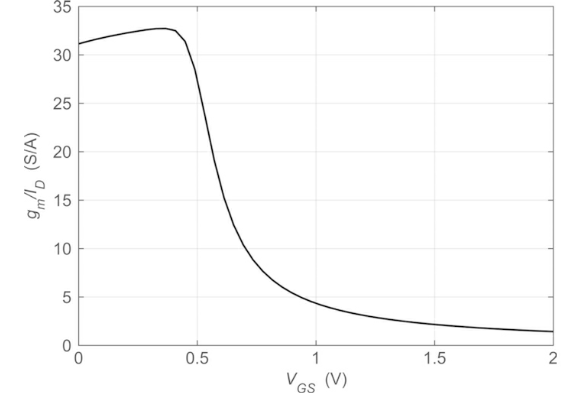

In [27]:
filepath_Book_65nm_figs = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_65nm\\plots_LUTs_python\\Book_Chap2\\'
fig_2_4_65nm = filepath_Book_65nm_figs + 'Book_Fig_2_4.png'
Image(fig_2_4_65nm, width=800, height=800)

## **`2.2 - The Basic EKV Model`**  
**The EKV model is the outcome of pioneering work at the Centre Electronique Horloger (CEH) in Switzerland. The name recognizes the contributions of C. Enz, F. Krummenacher and E. Vittoz.**  

*Two distinct transport mechanisms define the drain current of MOS transistors: drift and diffusion. Their contributions are illustrated by the first and second term inside the brackets of the drain current expression below:*

$I_D = \mu W (-Q_i*d\psi_s/dx + U_T * dQ_i/dx )$ `(2.1)`  
  
`The drift current is proportional to the electrical field represented by the derivative of the surface potential ψS with respect to the distance x along the channel. The diffusion current is proportional to the mobile charge density gradient represented by the derivative with respect to x of the mobile charge density Qi.`*  

From the following simplification:

$d(-Q_i/C_{ox}) = -n d \psi_s$ `(2.11)`  
  
It is now possible to substitute the charge density $Q_i$ to find the surface potential $\psi_s$. For this purpose we introduce the normalized mobile charge density $q$, defined as:
  
$q = - \frac {Q_i} {2nU_TC_{ox}}$ `(2.12)`  
  
This lets us rewrite 2.11 as:

$d\psi_s = -2U_Tdq$ `(2.13)`  
  
and we can now integrate 2.1 to find:
  
$i = (q_S^2 + q_S) - (q_D^2 + q_D)$ `(2.14)`

`where we call $q_S$ and $q_D$ the normalized mobile charge densities at the source and drain,5 respectively. The variable $i$ ($IC$ or inversion coefficient) is the normalized drain current, defined as:`
  
$i = IC = I_D/I_S$ `(2.15)`
  
Here, $I_S$ is the specific current, given by:  
  
$I_S = 2nU_T^2 * \mu Cox * W/L = 2nU_T^2 * \beta = I_{Ssq} * W/L $ `(2.16)`  
  
`In this expression, the introduction of ISsq, which is the specific current of a square transistor (W = L), offers the possibility to separate what depends on the technology (n, μ and Cox) and what is controlled by the circuit designer (W/L). Notice that IS can also be written as the product of 2*n*UT^2 times β, the so-called current factor.`  

**The basic EKV model makes use of a second equation that connects the non-equilibrium voltage V to q, the normalized mobile charge density along the channel. Which after integration does not require the surface potential (ψS) anymore:**

`The result is shown below, where we call VP the pinch-off voltage and the subscript x represents either the source S or the drain D, depending on the terminal that we consider:`
  
$V_P - V_x = U_T [2(q_x - 1) + log(q_x)]$ `(2.19)`  
  
*The above expression relates the non-equilibrium voltage $V_x$ along the channel to the local normalized mobile charge density $q_x$. At the source, $V_x$ becomes $V_S$, and the normalized mobile charge density is $q_S$, while at the drain we have $V_D$ and $q_D$. When $q_x = 1$, the non-equilibrium voltage $V_x$ equals $V_P$.*  
  
`At this point, drift and diffusion currents are equal and we are in the middle of the moderate inversion region.`  
  
*When $V_x$ gets smaller than $V_P$, we enter strong inversion. Conversely, when $V_x$ is larger than $V_P$, we enter weak inversion.* 
  
**Equations (2.14) and (2.19) let us link the normalized drain current $i$ ($IC$) to the pinch-off voltage $V_P$ as we turn the normalized mobile charge density into a parameter. When the source is grounded ($V_S = 0$) and the transistor is saturated ($q_D = 0$), the normalized drain current ($q$ substituted by $q_S$) boils down to the semilog curve shown in Figure 2.5(a). Note that this curve does not use any other quantity than UT.*


## **`Fig 2.5 - The Normalized drain current, i = IC, of a grounded-source saturated NMOS versus the Pinch-Off voltage Vp.`**  

In [28]:
# % data ===============
T = 300

# % compute ==============
kB = 1.38e-23
qe = 1.602e-19
UT = kB*T/qe
print(f"UT = {UT*1000} mV.")
qs = np.logspace(-4,2,num=100)
print(f"len(qs) = {len(qs)}.")
i = qs**2 + qs
VP = UT*(2*(qs-1) + np.log(qs))

D = 1/(UT*(qs + 1)) # dlog(i)/dVP
# gm_ID = NCH.look_up('GM_ID', L=L, VDS=VDS)
# gm_W = NCH.look_up('GM_W', L=L, VDS=VDS)

UT = 25.842696629213485 mV.
len(qs) = 100.


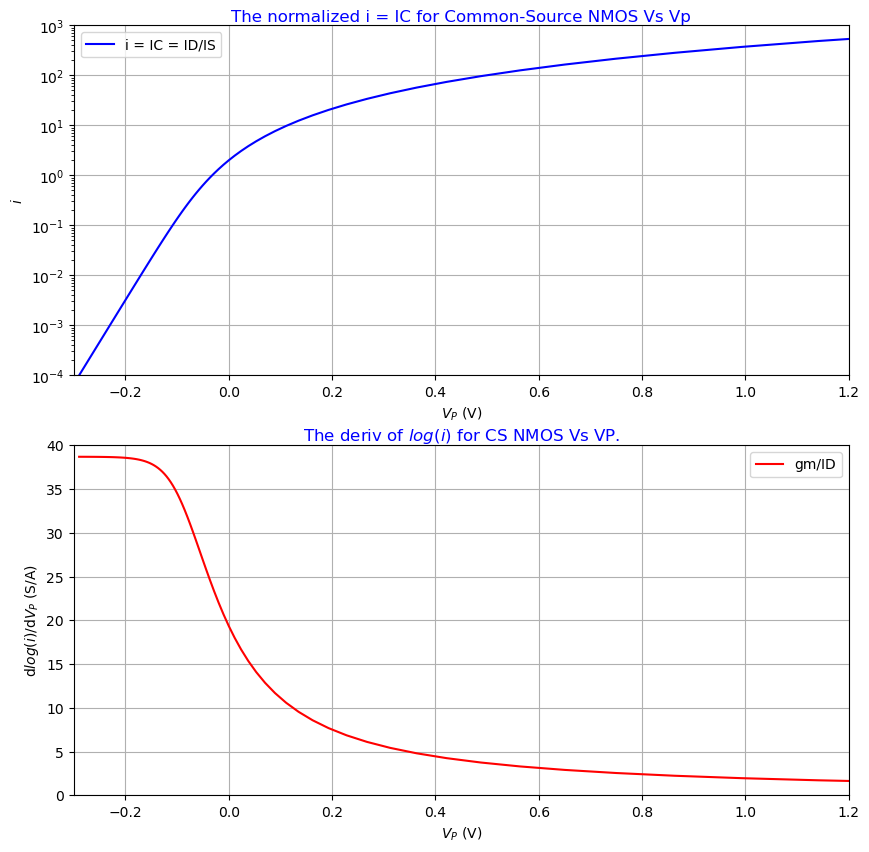

In [29]:
# % plot ====================
# plt.style.use('classic')
plt.rcParams.update(plt.rcParamsDefault)
fig5, axs5 = plt.subplots(2,1,figsize=(10,10))
# axs5.set_facecolor("white")
label1 = 'i = IC = ID/IS'
label2 = 'gm/ID'

title_dict = dict(fontsize=12, fontweight=2, color="blue", verticalalignment='center', horizontalalignment='center')
# Axes.set_title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)[source]
bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)

# plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

axs5[0].semilogy(VP, i, 'b-', label = label1)
axs5[0].grid(True)
axs5[0].set_ylabel(f'$i$')
axs5[0].set_xlabel(f'$V_P$ (V)')

axs5[0].set_ylim(bottom=1e-4, top=1e3)
axs5[0].set_xlim(left=-0.3, right=1.2)
# axs5[0].set_xscale("linear")
# axs5[0].set_xscale("log")
axs5[0].legend()

# res_str_gmID = f'Max gm/ID = {np.max(gm_ID):0.1f} (S/A).'
# axs5[0].annotate(res_str_gmID,
#              ((0.9), (0.7)), # these are the coordinates to position the label
#              xycoords='axes fraction',  # 'data' ; 'axes fraction' ; 'figure pixels'
#              color='black',
#              bbox=bbox_props,
#              ha='right') # center, left, right
axs5[0].set_title(f'The normalized i = IC for Common-Source NMOS Vs Vp', title_dict)

axs5[1].plot(VP, D, 'r-', label = label2)
axs5[1].grid(True)

axs5[1].set_ylabel(f'd$log(i)$/d$V_P$ (S/A)')
axs5[1].set_xlabel(f'$V_P$ (V)')

axs5[1].set_ylim(bottom=0, top=40)
axs5[1].set_xlim(left=-0.3, right=1.2)
axs5[1].legend()

# res_str_gmW = f'Max gm/W = {np.max(gm_W)*1e3:.3f} (mS/um).'
# axs5[1].annotate(res_str_gmW,
#              ((0.9), (0.2)), # these are the coordinates to position the label
#              xycoords='axes fraction',  # 'data' ; 'axes fraction' ; 'figure pixels'
#              color='black',
#              bbox=bbox_props,
#              ha='right') # center, left, right
axs5[1].set_title(f'The deriv of $log(i)$ for CS NMOS Vs VP.', title_dict)

if save_Figs:
    dpi = 600
    fig_EKV_i_2_5 = filepath_dir_fig + f'\\Fig_2_5_EKV_i_Vs_VP_and_dlogi_ov_dVP_pygmid'
    print(f"Saving figure: {fig_EKV_i_2_5}")
    plt.savefig(fig_EKV_i_2_5 + '.png', dpi = dpi, bbox_inches='tight')

plt.show()
# **************************************************************
# **************************************************************

**Taking the derivative of the log-scaled normalized drain current i with respect to VP yields the curve shown in Figure 2.5(b).**

$\frac{\partial log(i)}{\partial V_P} = 1/U_T * 1/(q+1)$ `(2.20)`  
  
`Note that when q << 1 (weak inversion), the expression boils down to the reciprocal of the thermal voltage UT. When q is equal to one, (2.20) equals the reciprocal of 2UT, right in the middle of the moderate inversion region. On the other hand, making q much larger than one places the device in the strong inversion region.`
  
**What we need now is a connection linking VP to the gate voltage VG. We know already from the plot of Example 2.1 that the pinch-off voltage and the gate voltage vary together. Based on this observation, (2.21) establishes a linear link.**
  
$V_P = (V_G - V_T) / n$ `(2.21)`  
  
`This expression incorporates two parameters, the subthreshold slope n (introduced earlier) and the threshold voltage VT.`  
A particularity of the latter is that it is defined with respect to the bulk, like VP, VS and VD.  
**The voltage difference (VT – VS) is thus simply the commonly accepted concept of threshold voltage defined with respect to the source, while the difference (VG – VT) represents the gate overdrive VOV, also commonly used in the literature.**


### **`Let us summarize`**
Two equations, (2.14) and (2.19), form the basis of basic EKV model. To reproduce the ID(VGS) characteristics, we use (2.15) and (2.21) to perform vertical and horizontal shifts of i(VP) (through IS and VT, respectively) as well as scaling (through n).  
  
**`This enables the modeling of ID versus VGS using only three parameters:`**   

 * 1. the subthreshold slope factor, $n$,

 * 2. the specific current, $I_S$,

 * 3. the threshold voltage, VT.
  

## **`Fig 2.6 - Drain current ID Vs Vgs with drift and diffusion contributions predicted by basic EKV Model.`**  
  
For a saturated MOS transistor ($q_D = 0$) in a grounded-source configuration ($V_S = 0$), we can replace $q_S$ with $q$, since the only terminal that matters is the source. Equations (2.14) and (2.15) then lead to:  
 * $i = (q_S^2 + q_S) - (q_D^2 + q_D)$ `(2.14)`  
 * $i = IC = I_D/I_S$ `(2.15)`  
  
$I_D = I_S * (q^2 + q)$ `(2.22)`  
  
Likewise, (2.19) modifies as shown below, since the non-equilibrium voltage at the source is zero ($V_x = V_S = 0$):
 * $V_P - V_x = U_T [2(q_x - 1) + log(q_x)]$ `(2.19)`  

$V_P = U_T [2(q - 1) + log(q)]$ `(2.23)`  

All we need to do now to plot $I_D$ versus $V_{GS}$ is to eliminate q between (2.22) and (2.23). To find the actual gate-to-source voltage $V_{GS}$ and drain current $I_D$, we make use of (2.21) and (2.15).  
 * $V_P = (V_G - V_T) / n$ `(2.21)`  
  
**Figure 2.6 shows the result for $q$ ranging from $10^−4$ (deep weak inversion) to $10^1$ (strong inversion), assuming $n$, $I_S$, and $V_T$ equal to $1.3$, $1 \mu A$, and $0.4 V$, respectively.**  
*The figure also shows the contributions of the drift and diffusion currents, proportional to $q^2$ and $q$, respectively, while the sum is the drain current $I_D$. Note that at the point where drift and diffusion currents are equal, $q$ is equal to one, thus $V_p$ is equal to zero.*  
**Hence, $V_G$ equals $V_T$ at this point.**
 

In [30]:
# # % data ===============
n   = 1.3 # % slope factor
IS  = 1e-6  # % specific current A
VT  = .4    # % threshold voltage V
step = .02
VG  = np.arange(0, 1.2+step, step)  # % gate voltage V

# # % compute ==============
kB = 1.38e-23
qe = 1.602e-19
# UT = kB*T/qe
UT = 0.026
print(f"UT = {UT*1000} mV.")
VP = (VG - VT)/n
qS = invq(VP/UT)
i = qS**2 + qS
ID = i*IS
VG = n*VP + VT

drift_ID = qS**2*IS
diffusion_ID = qS*IS

drift_ID_1D = to1D(drift_ID)
diffusion_ID_1D = to1D(diffusion_ID)
# new method!
xc, yc = interpolated_intercepts(VG,diffusion_ID_1D,drift_ID_1D)
print(f"xc = {xc} \n")
print(f"yc = {yc} \n")
# plt.semilogy(xc, yc, 'co', ms=5, label='Nearest data-point, with linear interpolation')

UT = 26.0 mV.
X-value already exists!
xc = [[0.4]] 

yc = [[1.e-06]] 



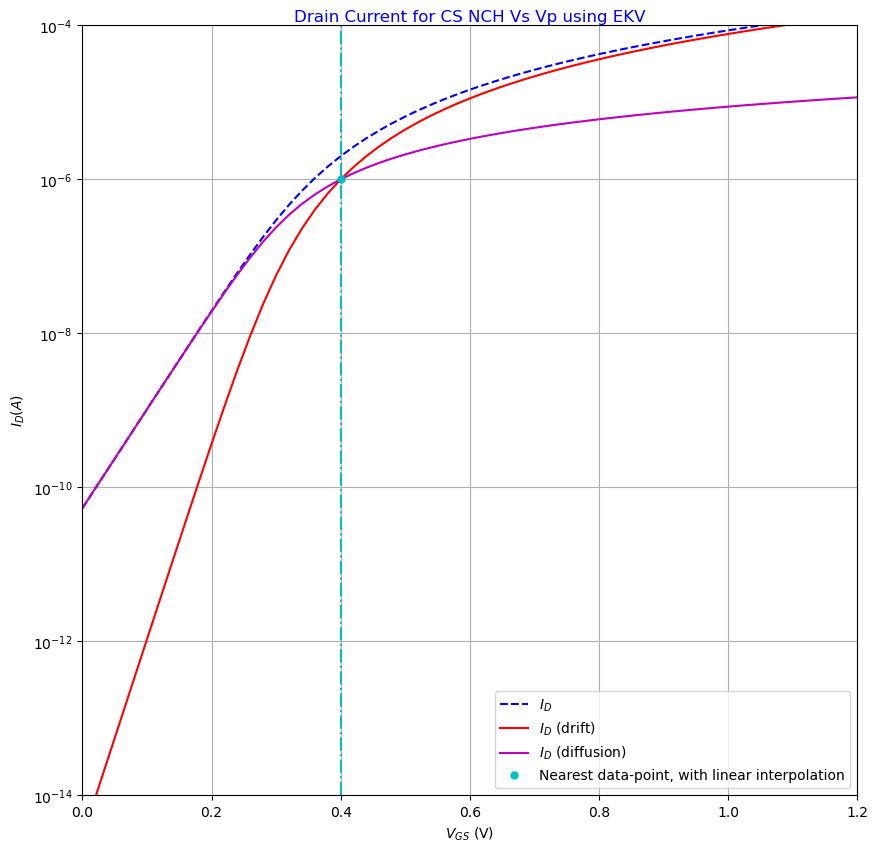

In [32]:
# % plot ====================
# plt.style.use('classic')
plt.rcParams.update(plt.rcParamsDefault)
fig, axs = plt.subplots(1,1,figsize=(10,10))
# axs.set_facecolor("white")
label1 = '$I_D$'
label2 = '$I_D$ (drift)'
label3 = '$I_D$ (diffusion)'

title_dict = dict(fontsize=12, fontweight=2, color="blue", verticalalignment='center', horizontalalignment='center')
# Axes.set_title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)[source]
bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)

# plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

axs.semilogy(VG, ID, '--b', label = label1)
axs.grid(True)
axs.semilogy(VG, drift_ID, 'r', label = label2)
axs.semilogy(VG, diffusion_ID, 'm', label = label3)
# *******************************
axs.semilogy(xc, yc, 'co', ms=5, label='Nearest data-point, with linear interpolation')
axs.semilogy([to1D(xc), to1D(xc)], [1e-14, 1e-4], '-.c', ms=5)
# *******************************
axs.set_ylabel(f'$I_D (A)$')
axs.set_xlabel('$V_{GS}$ (V)')

axs.set_ylim(bottom=1e-14, top=1e-4)
axs.set_xlim(left=0, right=1.2)
# axs[0].set_xscale("linear")
# axs[0].set_xscale("log")
axs.legend()

# res_str_gmID = f'Max gm/ID = {np.max(gm_ID):0.1f} (S/A).'
# axs[0].annotate(res_str_gmID,
#              ((0.9), (0.7)), # these are the coordinates to position the label
#              xycoords='axes fraction',  # 'data' ; 'axes fraction' ; 'figure pixels'
#              color='black',
#              bbox=bbox_props,
#              ha='right') # center, left, right
axs.set_title(f'Drain Current for CS NCH Vs Vp using EKV', title_dict)

if save_Figs:
    dpi = 600
    fig_EKV_i_2_6 = filepath_dir_fig + f'\\Fig_2_6_EKV_ID_Vs_VGS_drift_diffusion_EKV_pygmid'
    print(f"Saving figure: {fig_EKV_i_2_6}")
    plt.savefig(fig_EKV_i_2_6 + '.png', dpi = dpi, bbox_inches='tight')

plt.show()

### **Examples using Linear Interpolation**

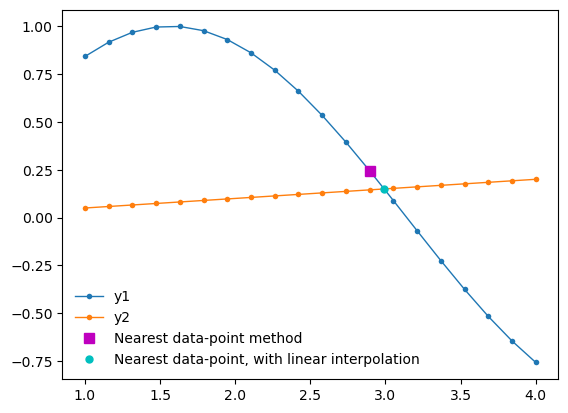

In [39]:
x  = np.linspace(1, 4, 20)
y1 = np.sin(x)
y2 = 0.05*x

plt.plot(x, y1, marker='o', mec='none', ms=4, lw=1, label='y1')
plt.plot(x, y2, marker='o', mec='none', ms=4, lw=1, label='y2')

idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)

plt.plot(x[idx], y1[idx], 'ms', ms=7, label='Nearest data-point method')

# new method!
xc, yc = interpolated_intercepts(x,y1,y2)
plt.plot(xc, yc, 'co', ms=5, label='Nearest data-point, with linear interpolation')


plt.legend(frameon=False, fontsize=10, numpoints=1, loc='lower left')

# plt.savefig('curve crossing.png', dpi=200)
plt.show()

xcs = [[3.07980908]
 [6.41234825]
 [9.23845378]] 

ycs = [[0.06159618]
 [0.12824697]
 [0.18476908]] 



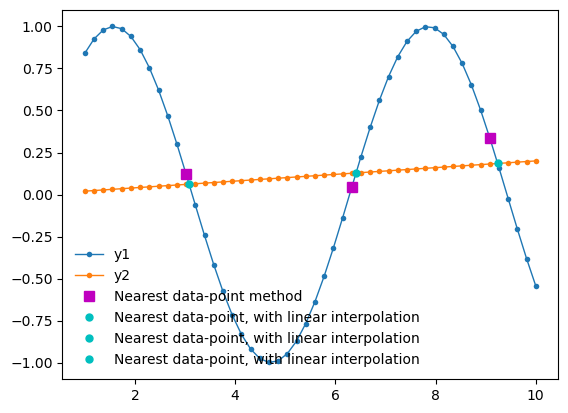

In [35]:
x  = np.linspace(1, 10, 50)
y1 = np.sin(x)
y2 = 0.02*x

plt.plot(x, y1, marker='o', mec='none', ms=4, lw=1, label='y1')
plt.plot(x, y2, marker='o', mec='none', ms=4, lw=1, label='y2')

idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)

plt.plot(x[idx], y1[idx], 'ms', ms=7, label='Nearest data-point method')

# new method!
xcs, ycs = interpolated_intercepts(x,y1,y2)
print(f"xcs = {xcs} \n")
print(f"ycs = {ycs} \n")
for xc, yc in zip(xcs, ycs):
    plt.plot(xc, yc, 'co', ms=5, label='Nearest data-point, with linear interpolation')


plt.legend(frameon=False, fontsize=10, numpoints=1, loc='lower left')
# plt.savefig('curve crossing.png', dpi=200)
plt.show()

X-value already exists!
X-value already exists!
X-value already exists!
X-value already exists!
xcs = [[1.]
 [3.]
 [5.]
 [7.]
 [9.]] 

ycs = [[-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]] 



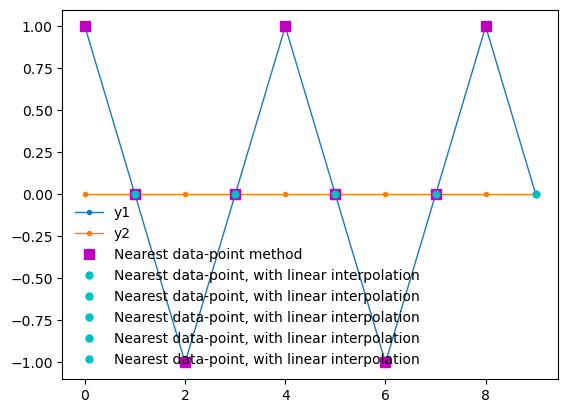

In [34]:
x  = np.array([0, 1, 2, 3,4,5,6,7,8,9])
y1 = np.array([1, 0, -1, 0,1,0,-1,0,1,0])
# y2 = np.zeros((10,1))
y2 = np.zeros(10)

plt.plot(x, y1, marker='o', mec='none', ms=4, lw=1, label='y1')
plt.plot(x, y2, marker='o', mec='none', ms=4, lw=1, label='y2')

idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)

plt.plot(x[idx], y1[idx], 'ms', ms=7, label='Nearest data-point method')

# new method!
xcs, ycs = interpolated_intercepts(x,y1,y2)
print(f"xcs = {xcs} \n")
print(f"ycs = {ycs} \n")
for xc, yc in zip(xcs, ycs):
    plt.plot(xc, yc, 'co', ms=5, label='Nearest data-point, with linear interpolation')

plt.legend(frameon=False, fontsize=10, numpoints=1, loc='lower left')
plt.show()

## **`Fig 2.6 - Drain current ID Vs Vgs with drift and diffusion contributions predicted by basic EKV Model.`**  
  
For a saturated MOS transistor ($q_D = 0$) in a grounded-source configuration ($V_S = 0$), we can replace $q_S$ with $q$, since the only terminal that matters is the source. Equations (2.14) and (2.15) then lead to:  
 * $i = (q_S^2 + q_S) - (q_D^2 + q_D)$ `(2.14)`  
 * $i = IC = I_D/I_S$ `(2.15)`  
  